# DTSC670: Foundations of Machine Learning Models
## Module 4
## Assignment 8: Polynomial Regression II

#### Name: Ejegu Smith

The purpose of this assignment is expose you to a (second) polynomial regression problem. Your goal is to:

1. Create the following figure using matplotlib, which plots the data from the file called `PolynomialRegressionData_II.csv`.  This figure is generated using the same code that you developed in Assignment 3 of Module 2 - you should reuse that same code.
2. Perform a PolynomialFeatures transformation, then perform linear regression to calculate the optimal ordinary least squares regression model parameters.
3. Recreate the first figure by adding the best fit curve to all subplots.
4. Infer the true model parameters.

Below is the first figure you must emulate:

<img src="PolynomialDataPlot_III.png" width ="800" />

Below is the second figure you must emulate:

<img src="PolynomialDataPlot_IV.png" width ="800" />

Each of the two figures has four subplots.  Note the various viewing angles that each subplot presents - you can achieve this with the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) method. Use the same color scheme for the datapoints shown here, which is called `jet`.  Be sure to label your axes as shown.

In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
#%matplotlib inline
%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

Begin by importing the data from the file called `PolynomialRegressionData_II.csv`.

In [2]:
import pandas as pd

fileName = "PolynomialRegressionData_II.csv"
df = pd.read_csv(fileName)
df.head()

,x,y,z
0,-3.319120,-4.692237,-3397.468030
1,8.812980,9.128139,17492.040881
2,-19.995425,-19.149264,-169660.383385
3,-7.906697,-8.766213,-17145.826565
4,-14.129764,-13.779218,-63847.758980


# Create First Image 

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

<IPython.core.display.Javascript object>


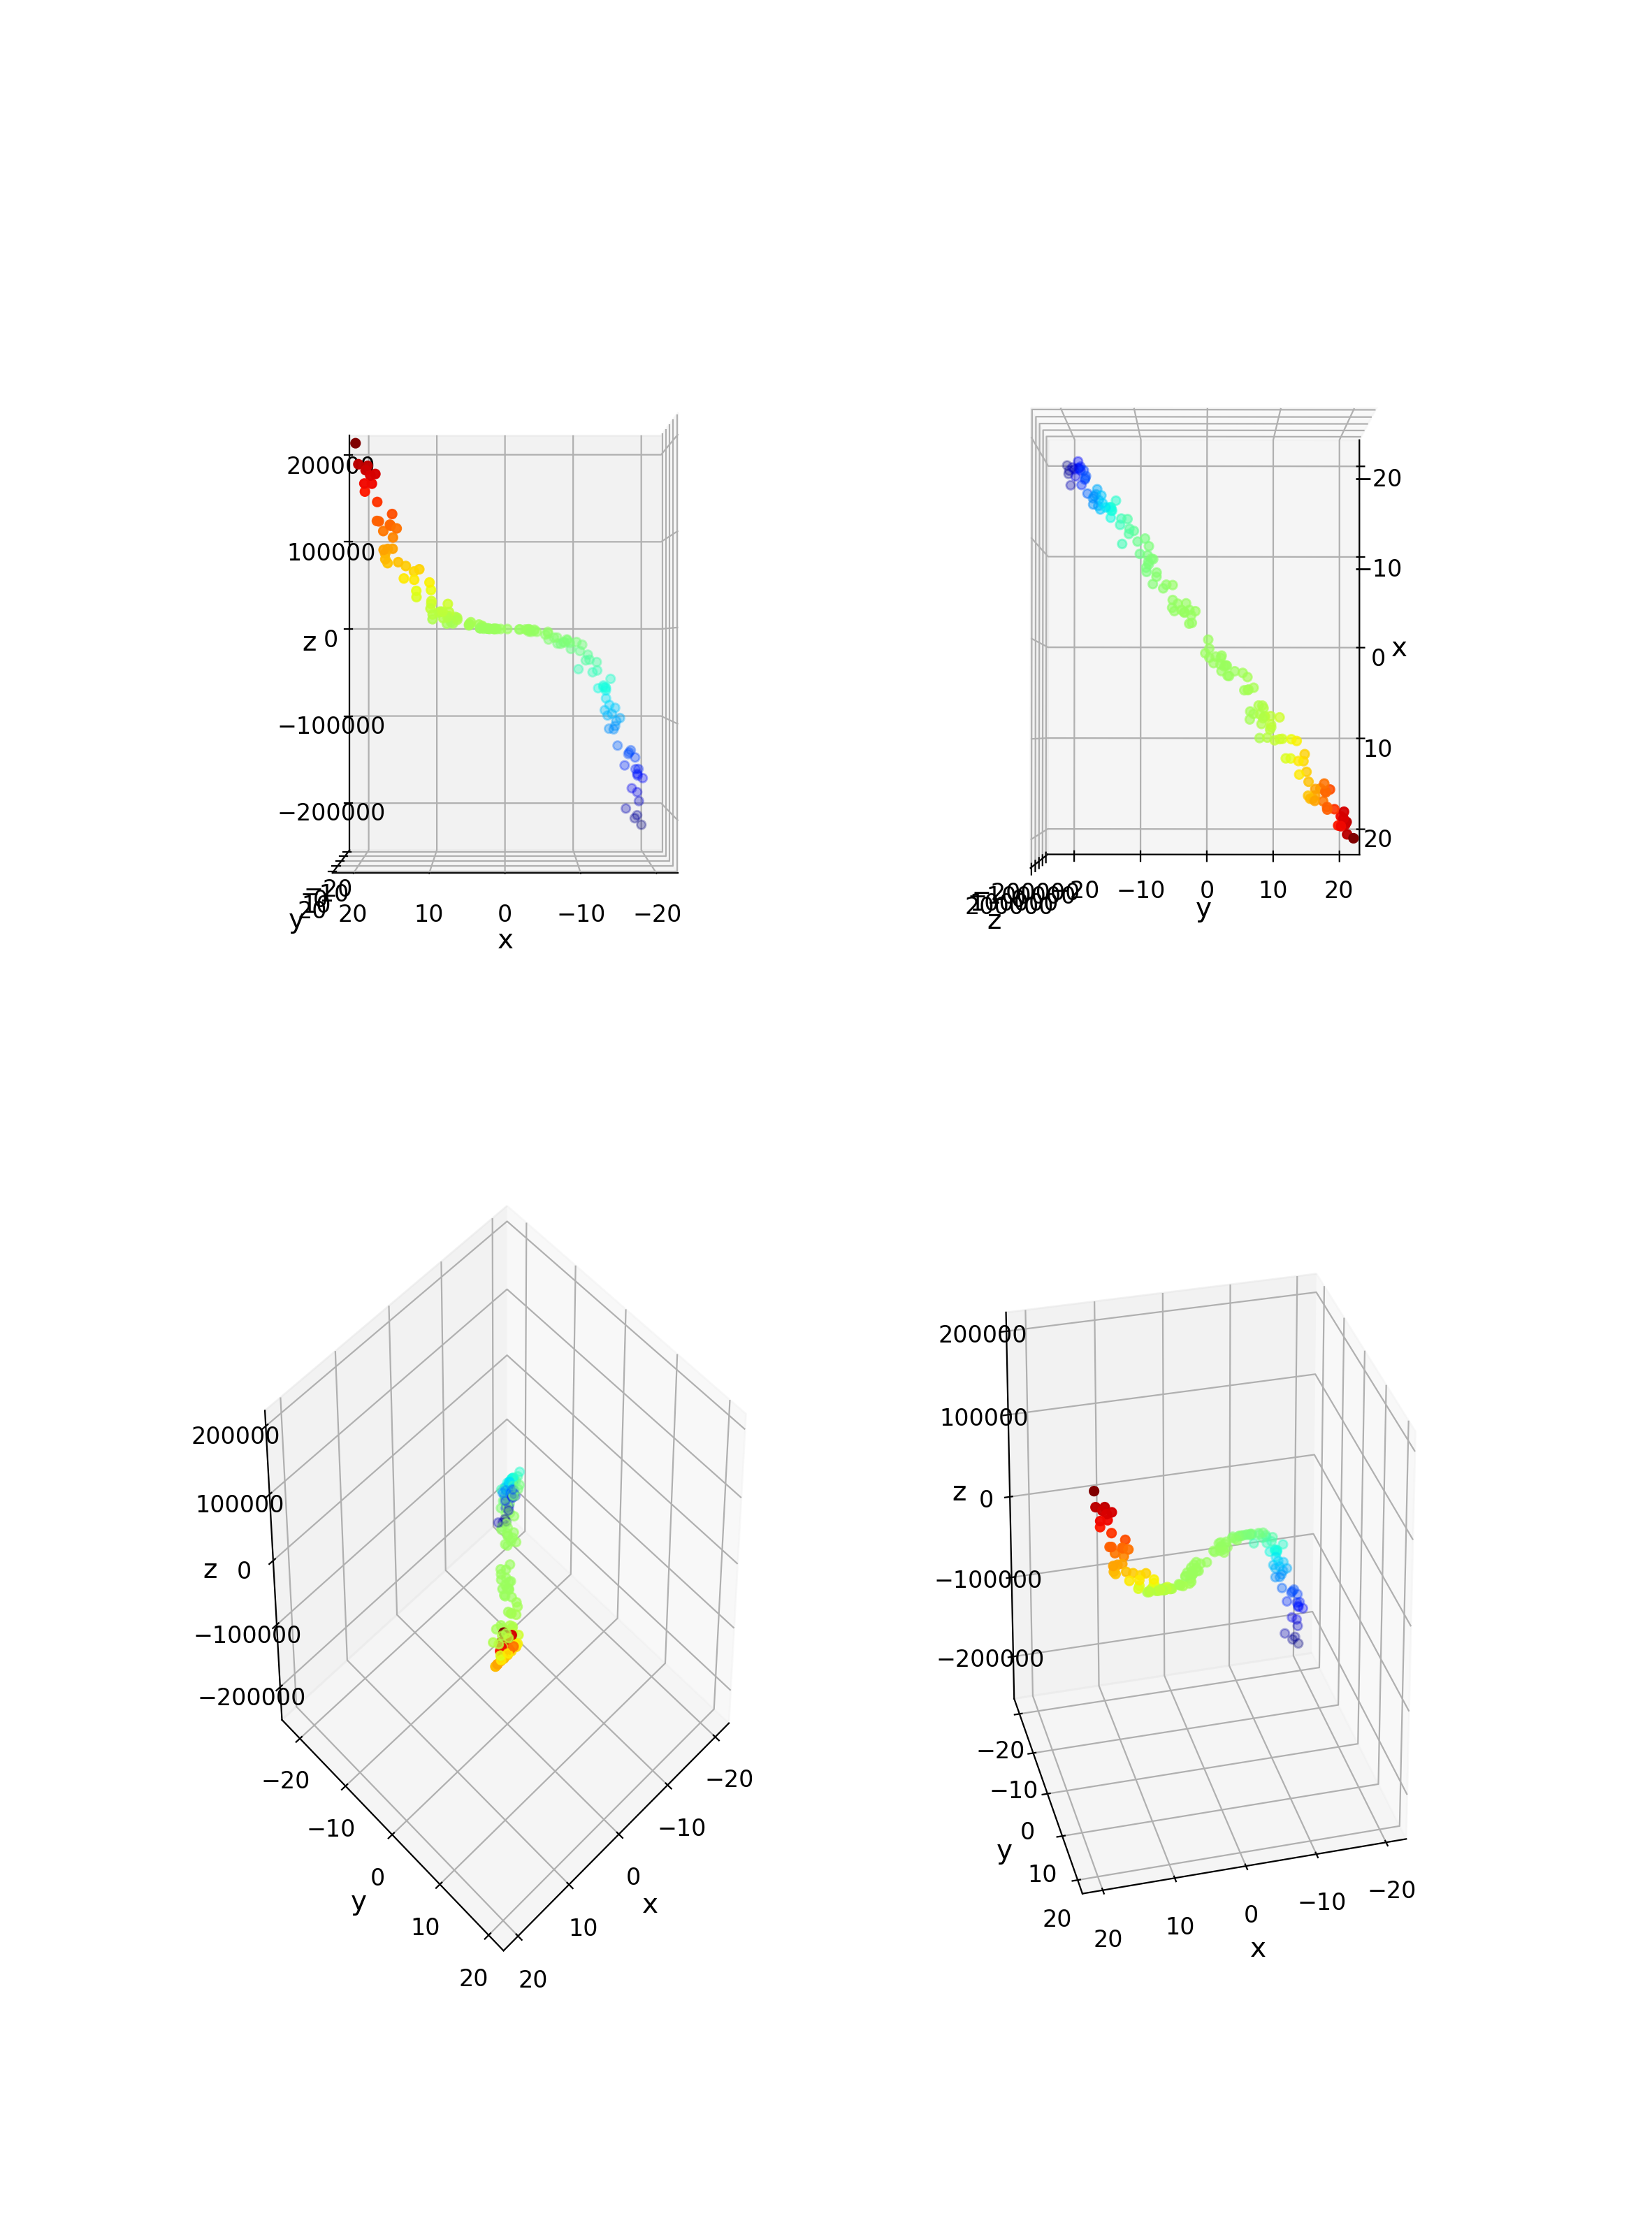

Text(0.5, 0, 'z')

In [3]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
#ax = plt.axes(projection='3d')

xline = df.x
yline = df.y
zline = df.z

#ax.scatter3D(xline, yline, zline)

## first subplot 
ax1 = fig.add_subplot(2,2,1, projection='3d')
ax1.view_init(0,90)
ax1.scatter3D(xline, yline, zline, c=zline, cmap='jet')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')

## second subplot
ax2 = fig.add_subplot(2,2,2, projection='3d' )
ax2.view_init(0,60)
ax2.scatter3D(xline, yline, zline, c=zline, cmap='jet')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')

## third subplot
ax3 = fig.add_subplot(2,2,3, projection='3d')
ax3.view_init(35,25)
ax3.scatter3D(xline, yline, zline, c=zline, cmap='jet')
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')

## fourth subplot
ax4 = fig.add_subplot(2,2,4, projection='3d')
ax4.view_init(35,15)
ax4.scatter3D(xline, yline, zline, c=zline, cmap='jet')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_zlabel('z')

# Perform Polynomial Features Transformation
Perform a polynomial transformation on your features.

In [4]:


response = pd.DataFrame(df.z)
features = df.drop('z', axis=1) #droping response variable from predictor dataframe

In [5]:
response.shape #checking

(150, 1)

In [6]:
features.shape #checking

(150, 2)

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(features)

In [8]:
len(X_poly)

150

In [9]:
X_poly_df = pd.DataFrame(X_poly) # creating df to pass to linear model below
X_poly_df.head()

,0,1,2,3,4,5,6,7,8
0,-3.319120,-4.692237,11.016556,15.574097,22.017089,-36.565270,-51.692295,-73.077357,-103.309404
1,8.812980,9.128139,77.668612,80.446105,83.322924,684.491903,708.969895,734.323241,760.583243
2,-19.995425,-19.149264,399.817021,382.897679,366.694326,-7994.511265,-7656.201835,-7332.208887,-7021.926579
3,-7.906697,-8.766213,62.515859,69.311791,76.846491,-494.293960,-548.027338,-607.601927,-673.652711
4,-14.129764,-13.779218,199.650241,194.697109,189.866859,-2821.010862,-2751.024273,-2682.773985,-2616.216920


# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an object of this class called `model`, and fit it to the data. `x` and `y` will be your training data and `z` will be your response. Print the optimal model parameters to the screen by completing the following `print()` statements.

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_poly, response)


LinearRegression()

In [11]:
print("Computed Model Coefficients: ", model.coef_)
print("Computed Model Intercept : ", model.intercept_)

Computed Model Coefficients:  [[13.11049659 -0.12551237 -0.06438612  0.12522049 -0.06044106 -0.03261149
   0.1003747  -0.10273803 24.03500349]]
Computed Model Intercept :  [-875.00648169]


# Create Second Image

Use the following `x_fit` and `y_fit` data to compute `z_fit` by invoking the model's `predict()` method.  This will allow you to plot the line of best fit that is predicted by the model.

In [12]:
# Plot Curve Fit
x_fit = np.linspace(-21,21,1000)
y_fit = x_fit

df_fit = pd.DataFrame({'x_fit': x_fit, 'y_fit': y_fit}) #creating df to plot later

In [13]:
df_fit.shape

(1000, 2)

In [14]:
z_transform = poly_features.fit_transform(df_fit)

In [15]:
z_fit = model.predict(z_transform)

In [16]:
z_fit.shape

(1000, 1)

Recreate the first image, but plot the line of best fit in each of the subplots as well.

In [17]:
z_fit = pd.DataFrame(z_fit) # changing z_fit from array to df to plt it
z_fit.head()

,0
0,-223411.783163
1,-222078.988158
2,-220751.527478
3,-219429.390423
4,-218112.566291


In [18]:
x_fit2 = df_fit[['x_fit']] #creating 2 more dfs to plt
y_fit2 = df_fit[['y_fit']]

In [19]:
x_fit2.head()

,x_fit
0,-21.000000
1,-20.957958
2,-20.915916
3,-20.873874
4,-20.831832


<IPython.core.display.Javascript object>


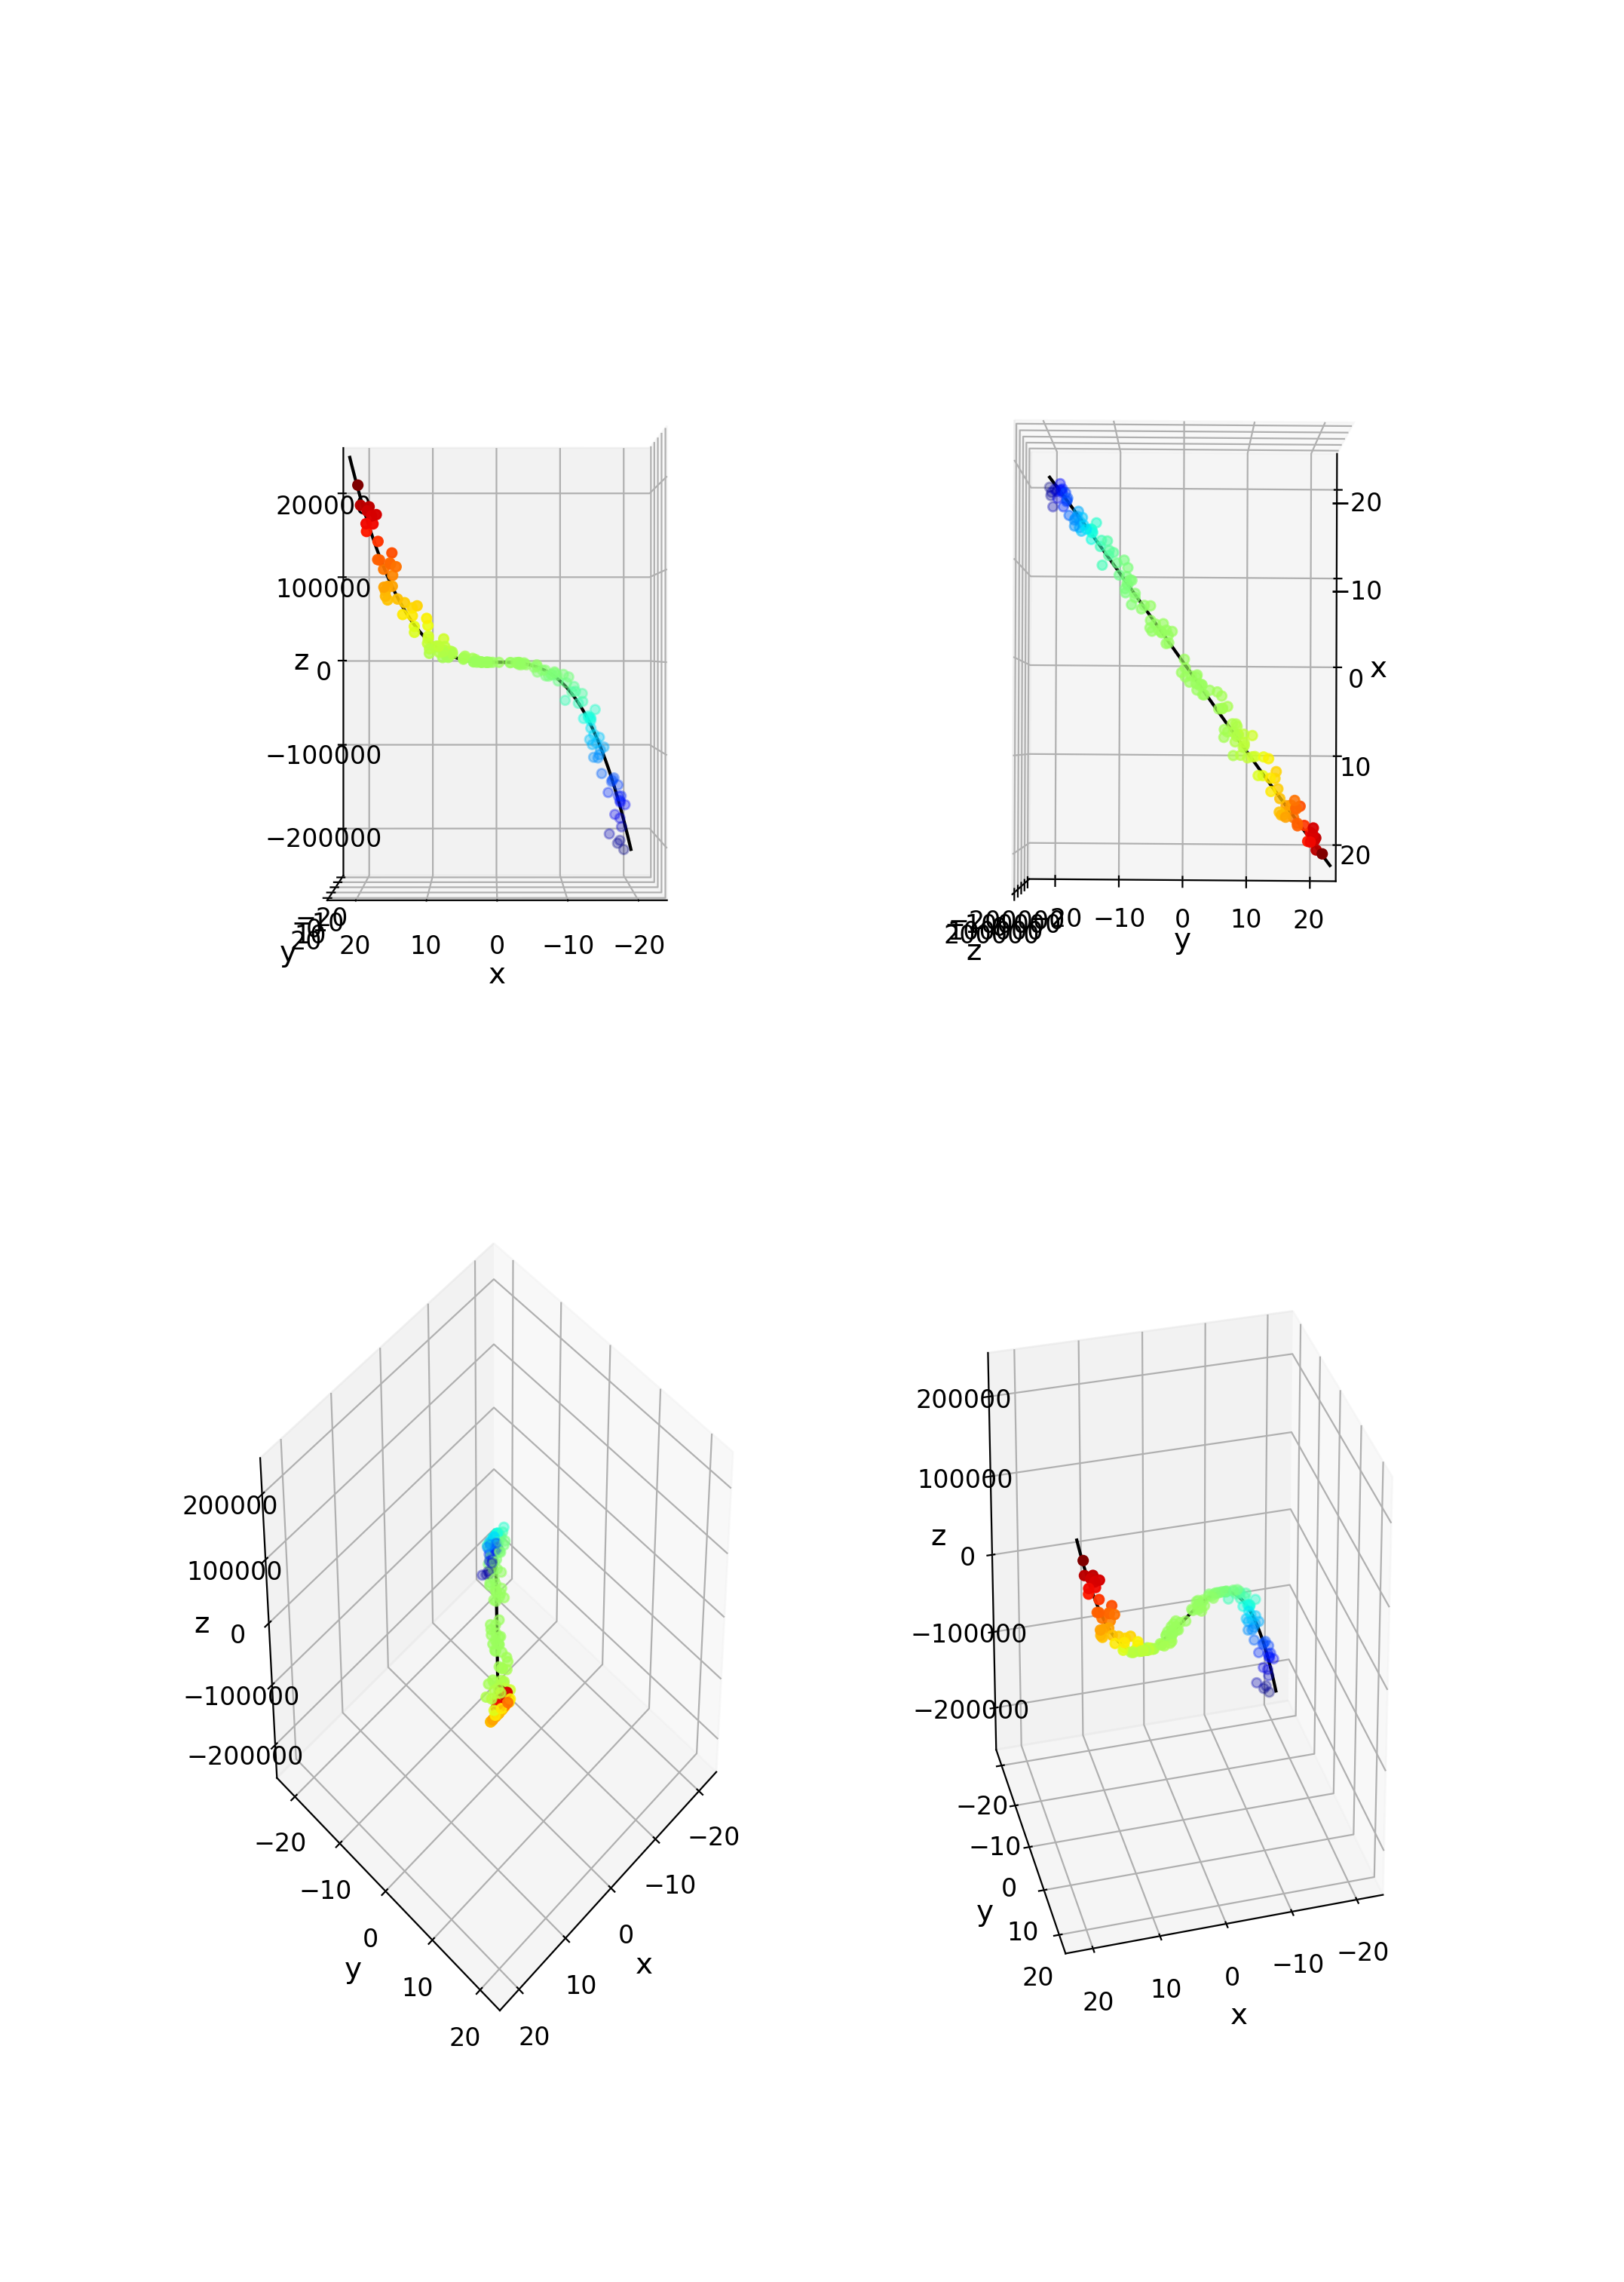

Text(0.5, 0, 'z')

In [20]:
#finally plot

#from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
#ax = plt.axes(projection='3d')

xline = df.x
yline = df.y
zline = df.z

#ax.scatter3D(xline, yline, zline)

## first subplot 
ax1 = fig.add_subplot(2,2,1, projection='3d')
ax1.scatter3D(xline, yline, zline, c=zline, cmap='jet')
ax1.plot(x_fit2['x_fit'], y_fit2['y_fit'], z_fit[0], color='black')
#ax1.view_init(-5,9)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')


## second subplot
ax2 = fig.add_subplot(2,2,2, projection='3d' )
ax2.scatter3D(xline, yline, zline, c=zline, cmap='jet')
ax2.plot(x_fit2['x_fit'], y_fit2['y_fit'], z_fit[0], color='black')
#ax2.view_init(20,20)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')



## third subplot
ax3 = fig.add_subplot(2,2,3, projection='3d')
ax3.scatter3D(xline, yline, zline, c=zline, cmap='jet')
ax3.plot(x_fit2['x_fit'], y_fit2['y_fit'], z_fit[0], color='black')
#ax3.view_init(20,20)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')


## fourth subplot
ax4 = fig.add_subplot(2,2,4, projection='3d')
ax4.scatter3D(xline, yline, zline, c=zline, cmap='jet')
ax4.plot(x_fit2['x_fit'], y_fit2['y_fit'], z_fit[0], color='black')
#ax4.view_init(140,60)
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_zlabel('z')



# Infer the True Model Parameters

Provided that the true model parameters are **integer values**, infer the true model parameters based on the optimal model parameter values that you calculated above.  You may "hard-code" these values into the below print statements. (see the assignment 3 template for further information)

Use the `get_feature_names()` method of the `PolynomialFeatures` class to be certain of which coefficients you calculated!  You need to report your final answers in a format that is ___abundantly clear___ to me which which coefficient corresponds to which dependent variable of the model!  You may add more `print()` statements to accomplish this if you wish.

In [21]:
round(-875.00648169)
#Computed Model Coefficients:  [[13.11049659 -0.12551237 -0.06438612  0.12522049 -0.06044106 -0.03261149
#  0.1003747  -0.10273803 24.03500349]]
#Computed Model Intercept :  [-875.00648169]

-875

In [22]:
list = [13.11049659, (-0.12551237), (-0.06438612),  0.12522049, (-0.06044106), (-0.03261149), 0.1003747,  (-0.10273803), 24.03500349]

for i in list:
    print(round(i))

13
0
0
0
0
0
0
0
24


In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly_features.get_feature_names(features.columns)

['x', 'y', 'x^2', 'x y', 'y^2', 'x^3', 'x^2 y', 'x y^2', 'y^3']

In [24]:
print("True Model Coefficients: ", "x = 13, y = 0, x^2 = 0, xy = 0, y^2 = 0, x^3 = 0, x^2 y = 0, x y^2 = 0, y^3 = 24 ")
print("True Model Intercept : ", "-875")

True Model Coefficients:  x = 13, y = 0, x^2 = 0, xy = 0, y^2 = 0, x^3 = 0, x^2 y = 0, x y^2 = 0, y^3 = 24 
True Model Intercept :  -875
